# 1.关于VariTensor

在该版本中，或者说大于0.4的版本中，Variable和Tensor合并了，意味着Tensor可以运行Variable，当然新版中也是可以任然单独运用Variable，但是返回的是Tensor

In [1]:
import torch
from torch.autograd import Variable

In [2]:
torch.__version__

'1.1.0'

In [3]:
x=torch.Tensor(3,4)
x

tensor([[-9.7165e+34,  5.7453e-43,  1.4013e-45,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [4]:
type(x)

torch.Tensor

In [5]:
x.requires_grad #默认为False

False

In [6]:
y=Variable(x)
print(y)

tensor([[-9.7165e+34,  5.7453e-43,  1.4013e-45,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [7]:
type(y)

torch.Tensor

# 1.1torch.Tensor和torch.tensor有区别

(1)类

在pytorch中，torch.Tensor是主要的tensor类，所有的tensor都是torch.Tensor的实例。torch.Tensor是torch.FloatTensor的别名


而torch.tensor是一个函数，返回的是一个tensor，在pytorch中，描述如下：
    
    torch.tensor(data,dtype=None,device=None,requires_grad=False) → Tensor
    Construct a tensor with data
    
    
(2)dtype类型

所以需要注意的一点是：
    
    torch.Tensor(data)是将输入的data转化为torch.FloatTensor
    torch.tensor(data)将data转化为torch.FloatTensor,torch.LongTensor,torch.DoubleTensor等类型，转化类型依赖于data的类型或者dtype的值
    
    
    
(3)创建空tensor

使用如下语句：tensor_without_data=torch.Tensor()可以创建一个空的FloatTensor，而当你使用tensor_without_data=torch.tensor()时候则会报错

当你想要创建一个空的tensor的时候，可以使用如下方法：

    tensor_without_data=torch.Tensor() #tensor([])
    tensor_without_data=torch.tensor(()) #tensor([])
    tensor_without_data=torch.empty([) #tensor(0.)
    
    
在创建空的tensor时，最好还是使用torch.tensor或者torch.empty

In [8]:
x==y

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)

# 2.叶子节点

对于那些不是任何函数的输出，由用户创建的节点称为叶子节点，叶子节点的grad_fn为None

In [9]:
import torch as t
a=t.ones(3,requires_grad=True)
b=t.rand(3,requires_grad=True)
print(a,a.is_leaf)

tensor([1., 1., 1.], requires_grad=True) True


In [10]:
print(b)

tensor([0.0458, 0.0572, 0.9932], requires_grad=True)


In [11]:
c=a*b
print(c.is_leaf)

False


In [12]:
print(a.grad_fn)
print(b.grad_fn)

None
None


In [13]:
print(c.grad_fn)

# 3.a为Tensor变量，有很多方法和属性可以用help(a)查看

In [14]:
print(help(a.backward))

Help on method backward in module torch.tensor:

backward(gradient=None, retain_graph=None, create_graph=False) method of torch.Tensor instance
    Computes the gradient of current tensor w.r.t. graph leaves.
    
    The graph is differentiated using the chain rule. If the tensor is
    non-scalar (i.e. its data has more than one element) and requires
    gradient, the function additionally requires specifying ``gradient``.
    It should be a tensor of matching type and location, that contains
    the gradient of the differentiated function w.r.t. ``self``.
    
    This function accumulates gradients in the leaves - you might need to
    zero them before calling it.
    
    Arguments:
        gradient (Tensor or None): Gradient w.r.t. the
            tensor. If it is a tensor, it will be automatically converted
            to a Tensor that does not require grad unless ``create_graph`` is True.
            None values can be specified for scalar Tensors or ones that
            don't

In [15]:
help(a.expand)

Help on built-in function expand:

expand(...) method of torch.Tensor instance
    expand(*sizes) -> Tensor
    
    Returns a new view of the :attr:`self` tensor with singleton dimensions expanded
    to a larger size.
    
    Passing -1 as the size for a dimension means not changing the size of
    that dimension.
    
    Tensor can be also expanded to a larger number of dimensions, and the
    new ones will be appended at the front. For the new dimensions, the
    size cannot be set to -1.
    
    Expanding a tensor does not allocate new memory, but only creates a
    new view on the existing tensor where a dimension of size one is
    expanded to a larger size by setting the ``stride`` to 0. Any dimension
    of size 1 can be expanded to an arbitrary value without allocating new
    memory.
    
    Args:
        *sizes (torch.Size or int...): the desired expanded size
    
    .. warning::
    
        More than one element of an expanded tensor may refer to a single
        me

In [16]:
help(a.grad_fn)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [17]:
x=t.tensor([[1],[2],[3]])
x.size()

torch.Size([3, 1])

In [18]:
y=x.expand(3,4)

In [19]:
y

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [20]:
y.size()

torch.Size([3, 4])

In [21]:
z=x.expand(-1,4)  # -1 means not changing the size of that dimension
z

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [22]:
z.size()

torch.Size([3, 4])

In [23]:
y==z

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)

# 4.求导-autograd操作

首先，tensor是默认不求导的，即requires_grad默认为False

In [26]:
d=t.ones(3)
print(d)
print(d.requires_grad)
print(d.size())

tensor([1., 1., 1.])
False
torch.Size([3])


如果某一个节点requires_grad被设置为TRUE，那么所有依赖于该节点的requires_grad都为TRUE

In [27]:
a=t.ones(3)
b=t.ones(3,requires_grad=True)
print(b.requires_grad)   #输出为True,但是a.requires_grad仍然为False

c=a+b
print(c.requires_grad)

True
True


并不是只有scalar才能进行backward操作，矩阵和向量也可以，只不过backward()中要添加对应维度的参数
* retain_graph=True是为了保存中间缓存，否则再次backward的时候会报错

In [29]:
a=t.ones(3,requires_grad=True)
b=t.rand(3,requires_grad=True)
print("1:",a,b)

c=a*b
print("2:",c)

#print("3:",c.backward(retain_graph=True))
#报错，内容为：只有数值scalar才能进行backward操作

d=c.sum()
print("4:",d.backward(retain_graph=True))

print("5:",a.grad)

print("6:",b.grad)

e=c.sum()
e.backward(retain_graph=True)
print("7:",b.grad)
#b的grad进行了两次backward后进行了累加

f=c.sum()
print("8:",b.grad)
#只进行计算不backward，梯度不更新

1: tensor([1., 1., 1.], requires_grad=True) tensor([0.8953, 0.2066, 0.3325], requires_grad=True)
2: tensor([0.8953, 0.2066, 0.3325], grad_fn=<MulBackward0>)
4: None
5: tensor([0.8953, 0.2066, 0.3325])
6: tensor([1., 1., 1.])
7: tensor([2., 2., 2.])
8: tensor([2., 2., 2.])


# 5.Tensor.data和Tensor.detach()

如果tensor的数值需要参与计算又不想参与到计算图的更新中，计算的时候可以用tensor.data,这样既能利用tensor的数值，又不会更新梯度

In [30]:
a=t.ones(3,4,requires_grad=True)
b=t.rand(3,4,requires_grad=True)

print(a.data.requires_grad,a.requires_grad) #因为a.data独立于计算图之外，所以返回False

c=a.data*b.data
d=c.sum()
print(d.backward)
#print(d.backward())会报错，因为独立于计算图之外，requires_grad=False，不能backward()


False True
<bound method Tensor.backward of tensor(6.3439)>


In [31]:
a.data

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [32]:
b.data

tensor([[0.5326, 0.9751, 0.4073, 0.1941],
        [0.4098, 0.9659, 0.2718, 0.0535],
        [0.4222, 0.8378, 0.7652, 0.5085]])

In [33]:
a

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [34]:
b

tensor([[0.5326, 0.9751, 0.4073, 0.1941],
        [0.4098, 0.9659, 0.2718, 0.0535],
        [0.4222, 0.8378, 0.7652, 0.5085]], requires_grad=True)

In [35]:
c=a*b
d=c.sum()
print(d.backward)  #注意这个d中有grad_fn属性

<bound method Tensor.backward of tensor(6.3439, grad_fn=<SumBackward0>)>


当tensor.data被修改的时候，tensor也会同步被修改，此时用该tensor进行计算的时候梯度的值就不在准确了，因为tensor已经被修改了

In [37]:
a=t.ones(3,4,requires_grad=True)
b=t.rand(3,4,requires_grad=True)
c=a*b
d=c.sum()
print(a)
a_=a.detach()
a_.sigmoid_()
print(a)
print(a_)


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)
tensor([[0.7311, 0.7311, 0.7311, 0.7311],
        [0.7311, 0.7311, 0.7311, 0.7311],
        [0.7311, 0.7311, 0.7311, 0.7311]], requires_grad=True)
tensor([[0.7311, 0.7311, 0.7311, 0.7311],
        [0.7311, 0.7311, 0.7311, 0.7311],
        [0.7311, 0.7311, 0.7311, 0.7311]])


In [39]:
# d.backward() 报错，因为a的值被修改了，所以不能再进行backward

# 6.autograd.grad和hook

在计算的时候我们可能会用到非叶子节点的grad,但是非叶子节点的grad在backward之后就会被自动清空

In [40]:
a=t.ones(3,4,requires_grad=True)
b=t.rand(3,4,requires_grad=True)
c=a*b
d=c.sum()
d.backward()
print(a.grad)
print(c.grad)
#c为非叶子节点，计算后被清空

tensor([[0.9307, 0.3436, 0.1300, 0.6054],
        [0.1395, 0.3512, 0.5476, 0.6505],
        [0.3289, 0.0268, 0.5199, 0.2468]])
None


可以用autograd.grad和hook来处理这种情况

In [41]:
#利用autograd.grad获取中间节点梯度
t.autograd.grad(d,c)

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),)

利用hook获取中间节点梯度

按照惯例,所有属性requires_grad=False的张量是叶子节点(即:叶子张量、
叶子节点张量).
对于属性requires_grad=True的张量可能是叶子节点张量也可能不是叶
子节点张量而是中间节点(中间节点张量).  如果该张量的属性requires_grad=True,
而且是用于直接创建的,也即它的属性grad_fn=None,那么它就是叶子节点.
如果该张量的属性requires_grad=True,但是它不是用户直接创建的,而是由其他张量
经过某些运算操作产生的,那么它就不是叶子张量,而是中间节点张量,并且它的属性
grad_fn不是None,比如:grad_fn=<MeanBackward0>,这表示该张量是通过torch.mean()
运算操作产生的,是中间结果,所以是中间节点张量,所以不是叶子节点张量.
判断一个张量是不是叶子节点,可以通过它的属性is_leaf来查看.

一个张量的属性requires_grad用来指示在反向传播时,是否需要为这个张量计算梯度.
如果这个张量的属性requires_grad=False,那么就不需要为这个张量计算梯度,也就
不需要为这个张量进行优化学习.

在PyTorch的运算操作中,如果参加这个运算操作的所有输入张量的属性requires_grad都
是False的话,那么这个运算操作产生的结果,即输出张量的属性requires_grad也是False,
否则是True. 即输入的张量只要有一个需要求梯度(属性requires_grad=True),那么得到的
结果张量也是需要求梯度的(属性requires_grad=True).只有当所有的输入张量都不需要求
梯度时,得到的结果张量才会不需要求梯度.


对于属性requires_grad=True的张量,在反向传播时,会为该张量计算梯度. 但是pytorch的
自动梯度机制不会为中间结果保存梯度,即只会为叶子节点计算的梯度保存起来,保存到该
叶子节点张量的属性grad中,不会在中间节点张量的属性grad中保存这个张量的梯度,这是
出于对效率的考虑,中间节点张量的属性grad是None.如果用户需要为中间节点保存梯度的
话,可以让这个中间节点调用方法retain_grad(),这样梯度就会保存在这个中间节点的grad属性中.

In [42]:
a=t.ones(3,4,requires_grad=True)
b=t.ones(3,4,requires_grad=True)
c=a*b
d=c.sum()
def print_grad(grad):
    print(grad)

#给C注册hook
c_hook=c.register_hook(print_grad)

print(d.backward())

#移除hook
c_hook.remove()

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
None


In [47]:
a=t.ones(3,4,requires_grad=True)
b=t.rand(3,4,requires_grad=True)
c=b*a
d=c.sum()
print(d.backward())

None


In [48]:
d

tensor(5.5680, grad_fn=<SumBackward0>)

In [49]:
c

tensor([[0.0235, 0.5821, 0.6759, 0.4059],
        [0.2676, 0.5405, 0.4357, 0.5614],
        [0.3701, 0.2910, 0.7306, 0.6837]], grad_fn=<MulBackward0>)

# 7.损失函数

In [1]:
from torch import nn
help(nn)

Help on package torch.nn in torch:

NAME
    torch.nn

PACKAGE CONTENTS
    _VF
    _functions (package)
    _qscheme
    _reduction
    backends (package)
    cpp
    functional
    grad
    init
    modules (package)
    parallel (package)
    parameter
    utils (package)

FILE
    d:\miniconda3\lib\site-packages\torch\nn\__init__.py




In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
sample=torch.ones(2,2,requires_grad=True)
target=torch.Tensor([[0,1],[2,3]])

In [4]:
type(sample),type(target)

(torch.Tensor, torch.Tensor)

In [5]:
sample

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [6]:
target

tensor([[0., 1.],
        [2., 3.]])

In [7]:
sample.dtype,target.dtype

(torch.float32, torch.float32)

# 7.1 nn.L1Loss

取预测值和真实值绝对误差的平均数

In [8]:
criterion=nn.L1Loss()
loss=criterion(sample,target)
print(loss)

tensor(1., grad_fn=<L1LossBackward>)


# 7.2 nn.SmoothL1Loss

SmoothL1Loss也叫Huber Loss,误差在(-1,1)是平方损失，其他情况L1损失

In [9]:
criterion=nn.SmoothL1Loss()
loss=criterion(sample,target)
loss

tensor(0.6250, grad_fn=<SmoothL1LossBackward>)

# 7.3 nn.MSELoss

我们最常见的损失函数

In [10]:
criterion=nn.MSELoss()
loss=criterion(sample,target)
loss

tensor(1.5000, grad_fn=<MseLossBackward>)

# 7.4 nn.BCELoss

二分类交叉熵损失函数

In [11]:
criterion=nn.BCELoss()
loss=criterion(sample,target)
loss

tensor(-13.8155, grad_fn=<BinaryCrossEntropyBackward>)

# 7.5 nn.CrossEntropyLoss

该损失函数结合了nn.LogSoftMax()和nn.NLLLoss()两个函数。它在做分类训练的时候非常有用，在训练过程中，对于每个类分配权值，可选参数权值应该是一个1D张量。当你有一个不平衡的训练集时，这是非常有用的。

* pytorch中的交叉熵
* softmax后的数值都在0-1之间，所以ln之后的值域是负无穷到0.
* 然后将softmax之后的结果取log，将乘法改成加法减少计算量，同时保证函数的单调性。
* NLLLoss的结果就是把上面的输出与label对应的那个值拿出来，去掉负号再求平均

In [13]:
import torch
import torch.nn as nn
x_input=torch.randn(3,3) #随机生成
print("x_input:\n",x_input)
y_target=torch.tensor([1,2,0]) #设置输出具体值

#计算输入softmax，此时可以看到每一行加起来的结果都是1
softmax_func=nn.Softmax(dim=1)
soft_output=softmax_func(x_input)
print("soft_output:\n",soft_output)

#在softmax的基础上取log
log_output=torch.log(soft_output)
print("log_output:\n",log_output)

#对比softmax与log的结合与nn.LogSoftmaxLoss的输出结果，发现两者是一致的
logsoftmax_func=nn.LogSoftmax(dim=1)
logsoftmax_output=logsoftmax_func(x_input)
print("logsoftmax_output:\n",logsoftmax_output)

#pytorch中关于NLLLoss的默认参数配置为：reducetion=True, size_average=True
nllloss_func=nn.NLLLoss()
nlloss_output=nllloss_func(logsoftmax_output,y_target)
print("nlloss_output:\n",nlloss_output)

#直接使用pytorch中的loss_func=nn.CrossEntropyLoss()看与经过NLLLoss的计算是不是一样
crossentropyloss=nn.CrossEntropyLoss()
crossentropyloss_output=crossentropyloss(x_input,y_target)
print("crossentropyloss_output:\n",crossentropyloss_output)

x_input:
 tensor([[ 0.1050, -0.1789,  0.1070],
        [ 1.0318, -1.3716,  1.1058],
        [ 1.3384, -1.5007,  0.2630]])
soft_output:
 tensor([[0.3630, 0.2733, 0.3637],
        [0.4614, 0.0417, 0.4969],
        [0.7145, 0.0418, 0.2438]])
log_output:
 tensor([[-1.0134, -1.2973, -1.0113],
        [-0.7734, -3.1768, -0.6995],
        [-0.3362, -3.1753, -1.4116]])
logsoftmax_output:
 tensor([[-1.0134, -1.2973, -1.0113],
        [-0.7734, -3.1768, -0.6995],
        [-0.3362, -3.1753, -1.4116]])
nlloss_output:
 tensor(0.7776)
crossentropyloss_output:
 tensor(0.7776)


# 8.优化器 Optim

优化器通俗来说就是一种计算导数的算法

各种优化器的目的和创造它们的初衷其实就是能够让用户选择一种适合自己场景的优化器。优化器最主要的衡量指标就是优化曲线的平稳度，最好的优化器就是每一轮样本数据的优化都让权重参数匀速的接近目标值，而不是忽上忽下的波动

因此，损失值的平稳下降对于一个深度学习模型来说是一个非常重要的衡量指标。

pytorch的优化器都位于torch.optim类中。常见的有：

    * SGD
    * Adam
    * Adadelta
    * Adagrad
    * Adamax等

pytorch还提供了定制优化器的接口

In [14]:
import torch.optim as optim
# optimizer=optim.SGD(model.params(),lr=0.1,momentum=0.9)

# 8.2 RMSprop

RMSprop通过引入一个衰减系数，让r每回合都衰减一定的比例，类似与Momentum中的做法。该优化器通常是面对递归神经网络时的一个良好选择。



In [25]:
#自定义实现RMSprop
def Rmsprop(parameters,sqrs,lr,alpha):
    '''
    alpha:平滑系数
    eps: 数值稳定性系数，加在分母上
    '''
    eps=1e-10
    for param,sqr in zip(parameters,sqrs):
        sqr[:]=alpha*sqr+(1-alpha)*param.grad.data**2
        div=lr/torch.sqrt(sqr+eps)*param.grad.data
        param.data=param.data-div

实战

In [16]:
import numpy as np
import torch 
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch import nn
import time 
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def data_tf(x):
    x=np.array(x,dtype="float32")/255
    x=(x-0.5)/0.5 #标准化
    x=x.reshape((-1,))
    x=torch.from_numpy(x)
    return x

train_set=MNIST("data",train=True,transform=data_tf,download=True)   #载入数据集，申明定义的数据变换
test_set=MNIST("data",train=False,transform=data_tf,download=True) 

#定义loss函数
criterion=nn.CrossEntropyLoss()

In [18]:
#数据加载器，结合了数据集和取样器，并且可以提供多个线程处理数据集
#在训练模型时使用到此函数，用来把训练数据分成多个小组，此函数每次抛出一组数据。直至把所有的数据都抛出
train_data=DataLoader(train_set,batch_size=64,shuffle=True)

In [19]:
for im,data in train_data:
    print(im.shape,data.shape)
    print(im[0][:].shape)
    break

torch.Size([64, 784]) torch.Size([64])
torch.Size([784])


In [21]:
#使用Sequential 定义3层神经网络
net=nn.Sequential(
    nn.Linear(784,200),
    nn.ReLU(),
    nn.Linear(200,10)
)

In [22]:
#初始化梯度平方项
sqrs=[]
for param in net.parameters():
    sqrs.append(torch.zeros_like(param.data))

In [26]:
#开始训练
losses=[]
idx=0
start=time.time() #计时开始
for e in range(5):
    train_loss=0
    for im,label in train_data:
        #前向传播
        out=net(im)
        loss=criterion(out,label)
        #反向传播
        net.zero_grad()
        loss.backward()
        Rmsprop(net.parameters(),sqrs,1e-3,0.9)
        #记录误差
        train_loss+=loss.item()
        if idx % 30==0:
            losses.append(loss.item())
        idx+=1
    print("epoch:{},Train Loss:{:.6f}".format(e,train_loss/len(train_data))) #len(train_data)为总batch数=938
end=time.time()
print("使用时间:{:.5f}s".format(end-start))

epoch:0,Train Loss:0.371302
epoch:1,Train Loss:0.168505
epoch:2,Train Loss:0.124179
epoch:3,Train Loss:0.102359
epoch:4,Train Loss:0.088422
使用时间:39.66629s


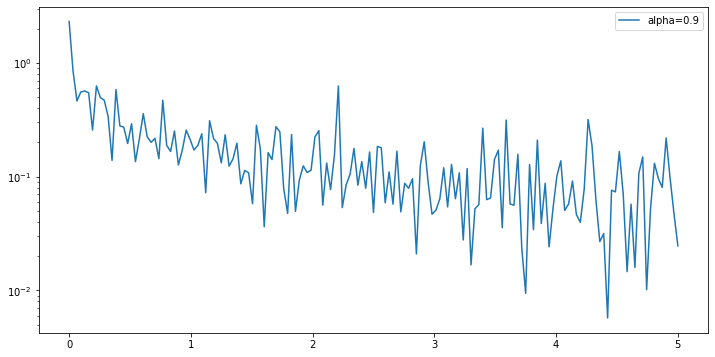

In [27]:
x_axis=np.linspace(0,5,len(losses),endpoint=True)
plt.figure(figsize=[12,6])
plt.semilogy(x_axis,losses,label="alpha=0.9") #y轴的刻度的那种变化用这个
plt.legend(loc="best")
plt.show()

改变alpha的值，查看loss在下降过程中的震荡程度

In [28]:
train_data=DataLoader(train_set,batch_size=64,shuffle=True)
net=nn.Sequential(nn.Linear(784,200),
                 nn.ReLU(),
                 nn.Linear(200,10))
sqrs=[]
for param in net.parameters():
    sqrs.append(torch.zeros_like(param.data))
    
losses=[]
idx=0

start=time.time() #计时开始
for e in range(5):
    train_loss=0
    for im,label in train_data:
        out=net(im)
        loss=criterion(out,label)
        net.zero_grad()
        loss.backward()
        Rmsprop(net.parameters(),sqrs,1e-3,0.999)
        train_loss+=loss.item()
        if idx % 30==0:
            losses.append(loss.item())
        idx+=1
        
    print("epoch:{},Train Loss:{:.6f}".format(e,train_loss/len(train_data)))
    
end=time.time()
print("使用时间：{:.5f}s".format(end-start))

epoch:0,Train Loss:0.455181
epoch:1,Train Loss:0.169873
epoch:2,Train Loss:0.131455
epoch:3,Train Loss:0.109435
epoch:4,Train Loss:0.093445
使用时间：40.27390s


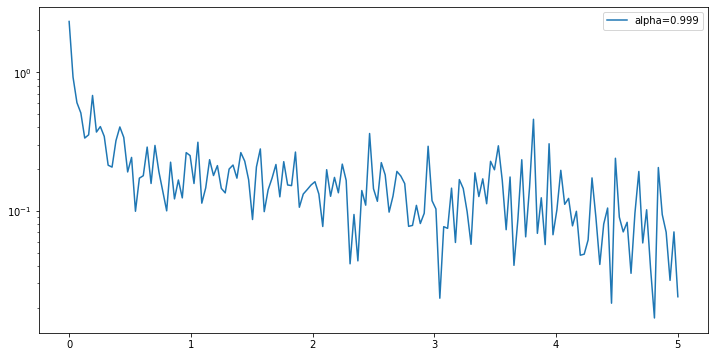

In [29]:
x_axis=np.linspace(0,5,len(losses),endpoint=True)
plt.figure(figsize=[12,6])
plt.semilogy(x_axis,losses,label="alpha=0.999")
plt.legend()
plt.show()

使用pytorch内置的rmsprop的方法，非常简单，只需要调用torch.optim.RMSprop()就可以了

In [30]:
train_data=DataLoader(train_set,batch_size=64,shuffle=True)
net=nn.Sequential(nn.Linear(784,200),
                 nn.ReLU(),
                 nn.Linear(200,10))
optimizer=torch.optim.RMSprop(net.parameters(),lr=1e-3,alpha=0.9)

start=time.time() #计时开始
for e in range(5):
    train_loss=0
    for im,label in train_data:
        out=net(im)
        loss=criterion(out,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
        
    print("epoch:{},Train Loss:{:.6f}".format(e,train_loss/len(train_data)))
    
end=time.time()
print("使用时间：{:.5f}s".format(end-start))

epoch:0,Train Loss:0.384392
epoch:1,Train Loss:0.173684
epoch:2,Train Loss:0.127147
epoch:3,Train Loss:0.103855
epoch:4,Train Loss:0.091037
使用时间：42.29739s
